<p style='direction:rtl; text-align: right'>ابتدا باید کتابخانه های زیر را وارد کنیم:
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>ipywidgets: برای استفاده از ویجت های نمایشی</li>
        <li>IPython.display: برای نمایش ویجت ها</li>
    </ul>
</p>

</p>

In [3]:
%matplotlib inline
%matplotlib notebook

In [4]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display

<h1 style='direction:rtl; text-align: right'>
پروژه۴: پیاده سازی الگوریتم Metropolis-Hastings
</h1>

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۱: پیاده سازی تابع $\pi$ 
</h2>
<p style='direction:rtl; text-align: right'>این تابع توزیعی است که قصد شبیه سازی آن را داریم:
    <ul style='direction:rtl; text-align: right'>
        <li>ورودی های این تابع x و V هستند.</li>
        <li>بردار V بردار انتقال است. در حالت پیش فرض همان ماتریس همانی در نظر گرفته میشود.</li>
        <li>خروجی تابع باید مقدار زیر باشد(توزیع گوسی):
        <ul style='direction:rtl; text-align: right'>
            $e^{-\frac{1}{2}xVx}$
        </ul>
        </li>
        </ul>
</p>

In [6]:
def pi(x, V):
    '''
    x -- np array of size k
    V -- np array of size k*k
    '''
    return np.exp(-.5*np.dot(x, np.dot(V,x)))

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۲: پیاده سازی تابع random proposition 
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>در این تابع مقدار random proposition محاسبه میشود.</li>
        <li>خروجی تابع باید مقدار زیر باشد:
        <ul style='direction:rtl; text-align: right'>
            $x+normal\_distribution$
        </ul>
        </li>
        </ul>
</p>

In [7]:
def prop(x):
    '''
    Random proposition for the Metropolis-Hastings algorithm.
    Uses the Random Walk Metropolis formula with unit variance.
    
    x -- np array of size k
    '''
    return x + normal(size=len(x))

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۳: پیاده سازی تابع transition probability 
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>transition probability از توزیع گوسی هستند.</li>
        <li>خروجی تابع باید مقدار زیر باشد:
        <ul style='direction:rtl; text-align: right'>
            $e^{-\frac{1}{2}(X-Y)^2}$
        </ul>
        </li>
        </ul>
</p>

In [8]:
def q(x,y):
    '''
    Probability density of transition x to y, up to a constant.
    Uses the Random Walk Metropolis formula with unit variance.
    
    x -- np array of size k
    y -- np array of size k
    '''
    dist = x-y
    return np.exp(-.5*np.dot(dist,dist))

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۴: نمایش توزیع  
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا ماتریس انتقال همانی را بسازید و در متغیر V بریزید.(در ادامه به این قسمت برگردید و ماتریس های مختلف را تست کنید)</li>
        <li>با استفاده از تابع np.arange محور های x , y را بسازید به صورتی که از 3- تا 3 و با استپ 1. باشند.
        </li>
        <li>با استفاده از تابع np.meshgrid صفحه مختصات را تولید کنید و در متغیر های X و Y ذخیره کنید. توجه کنید که در این تابع از متغیر های x و y که در قسمت قبل تولید کردید استفاده می شود.
        </li>
        <li>با استفاده از تابع احتمال تعریف شده در قسمت۱.۱ فراوانی هر نقطه در صفحه مختصات را که در متغیر X و Y ذخیره کرده بودید را بدست بیاورید و در متغیر Z ذخیره کنید.
        </li>
        <li>با استفاده از تابع plt.contour نمودار را نمایش دهید. ورودی ها به ترتیب X و Y و Z هستند.
        </li>
        </ul>
</p>

<IPython.core.display.Javascript object>


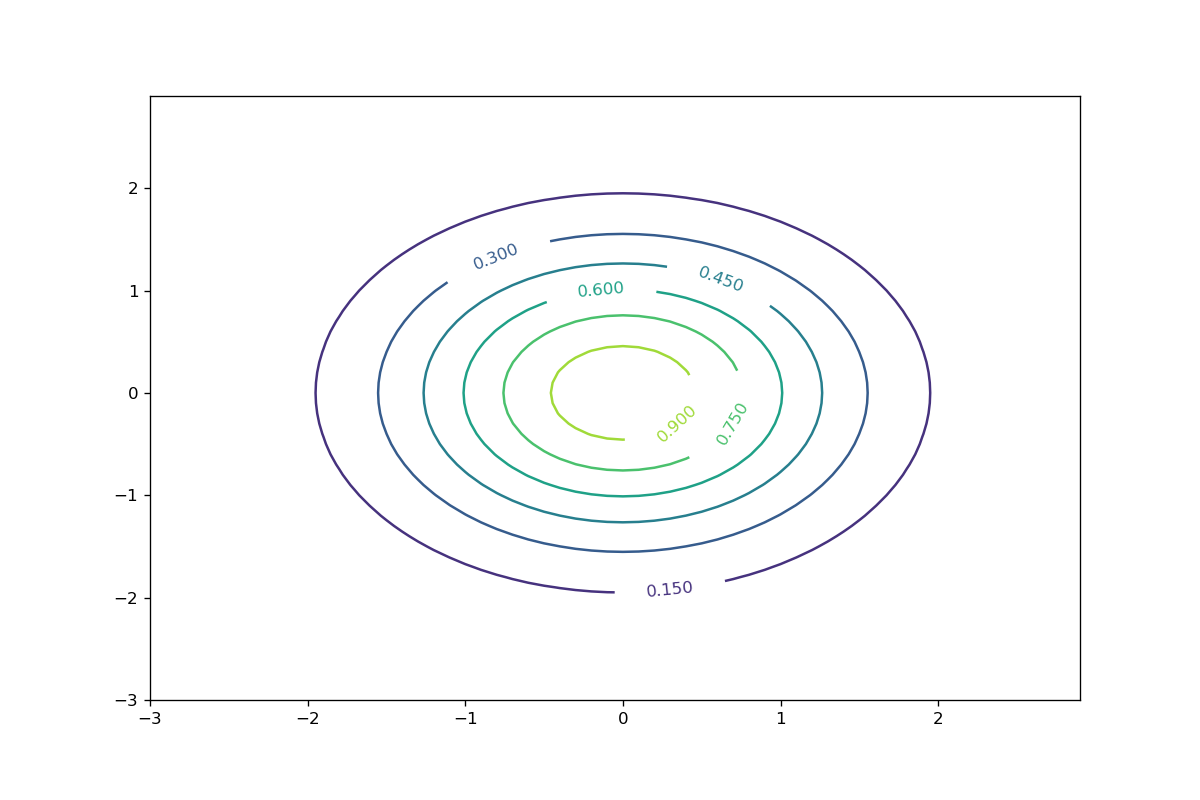

In [9]:
V = np.array([[1,0],[0,1]])
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.array([[pi(np.array([X[i,j],Y[i,j]]),V=V) for j in range(len(X[0]))] for i in range(len(X))])
fig1 = plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10);

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۴: پیاده سازی تابع Metropolis-Hastings   
</h2>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>از نقطه ۰و۰ در صفحه مختصات شروع میکنیم.</li>
        <li>مقدار prop نقطه را حساب میکنیم.  حاصل برابر نقطه جدید است.
        </li>
        <li>سپس نرخ جابه جایی را توسط رابطه زیر حساب میکنیم:
            <ul style='direction:rtl; text-align: right'>
                <li>$\frac{\pi(y)*q(x,y)}{\pi(x)*q(y,x)}$</li></ul>
            </li>
        <li>عدد تصادفی r را تولید کرده و با نرخ جابه جایی مقایسه کنید. در صورتی که عدد تصادفی از نرخ کمتر بود جابه جایی انجام میشود. در نتیجه نقطه جدید را جایگزین نقطه قبلی کنید و روند را ادامه دهید.
        </li>
        <li>نقاط بدست آمده را ذخیره کنید و در انتها به عنوان خروجی تابع استفاده کنید.
        </li>
        </ul>
</p>

In [10]:
def MH(iteration,pi,q,prop,x0=np.zeros(2),V=np.identity(2)):
    x = x0
    trajectory = [x0]
    for i in range(1,iteration):
        y = prop(x)
        ratio = pi(y,V)*q(x,y)/pi(x,V)/q(y,x)
        a = np.min([1.,ratio])
        r = np.random.rand()
        if r < a:
            x = y
        trajectory.append(x)
    return np.array(trajectory)

<h2 style='direction:rtl; text-align: right'>
قسمت ۱.۵: نمایش توزیع شبیه سازی شده  
</h2>


In [11]:
traj = MH(10000,pi,q,prop,V=V)

<IPython.core.display.Javascript object>


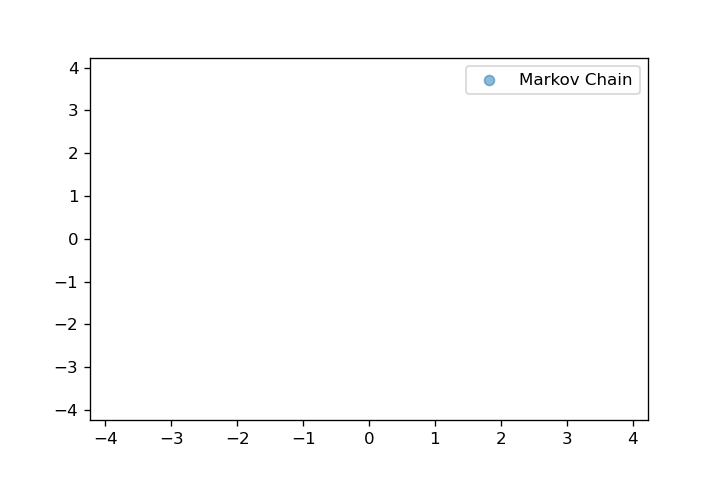

IntSlider(value=0, max=10000)

Button(description='Advance', style=ButtonStyle())

In [12]:
def start_scatter_first(trajectory):
    fig = plt.figure()
    lim = np.max(np.abs(trajectory[:,]))
    plt.xlim((-lim, lim))
    plt.ylim((-lim, lim))
    plt.scatter(trajectory[:1,0],trajectory[:1,1],alpha=.5,label='Markov Chain')
    plt.legend(loc='best')
    plt.show()
    return fig

fig2 = start_scatter_first(traj)

def update_scatter_first(n,trajectory,figure):
    t = trajectory[:n]
    plt.figure(figure.number)
    pc1, = figure.axes[0].collections
    pc1.set_offsets(t)
    
def update_length_first(value):
    update_scatter_first(n=value['new'],trajectory=traj,figure=fig2)
    
slider_first = widgets.IntSlider(min=0,max=10000,step=1)
display(slider_first)
slider_first.observe(update_length_first,names='value')
def incrementSlider(b):
    slider_first.value += 1
advanceButton = widgets.Button(value=False,description='Advance')
display(advanceButton)
advanceButton.on_click(incrementSlider)

In [13]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])